<a href="https://colab.research.google.com/github/art-python/MSDeakin/blob/SIG742-Modern-Data-Science/SIG742Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student ID:** ***S22301XXX***

**Student Name:** ***XXXXXXXXXXXXX***


# Part-1
## Data Acquisition and Manipulation

### Data Preprocessing

In [1]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Note for Team:**

Click the link below to access the Google Drive page. Add it to your Google Drive and then utilize it in Google Colab. You only need to provide authentication to access your Google Drive and use the datasets stored in the folder.

https://drive.google.com/drive/folders/1Y1_AFrHJaIMt4m8FXXBzv4XEme4QrirB?usp=sharing

In [2]:
# to import the file from google drive, mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load the dataset file and read the csv
folder_path = "/content/drive/MyDrive/MSDeakin/SIG742_Modern-Data-Science/SIG742_Task2/"
file_name = "item_listing_category.csv"

# Load the CSV file into a DataFrame
dataset = pd.read_csv(folder_path + file_name)

In [4]:
dataset.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,clean_description
0,128037,Bundle for Sassy Sisters,3,Women/Tops & Blouses/Blouse,NaN,16.0,0,max cleo black dress paper crane black tank to...
1,491755,PINK VS TANK,2,"Women/Tops & Blouses/Tank, Cami",NaN,17.0,0,sequin pink sign sequins missing gently worn
2,470924,Funko Pop Unmasked Cyclops,1,Kids/Toys/Action Figures & Statues,Funko,30.0,1,box great condition comes soft pop protector p...
3,491263,Baby Roshe Runs,3,Kids/Boys 2T-5T/Shoes,Nike,19.0,0,baby black nike roshe runs size 5c
4,836489,Baby Girl Ralph Lauren dresses,3,Kids/Girls 0-24 Mos/Dresses,Ralph Lauren,24.0,0,2 polo dresses 3 months wore washed dreft pink...


In [5]:
dataset.shape

(355808, 8)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355808 entries, 0 to 355807
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   train_id           355808 non-null  int64  
 1   name               355808 non-null  object 
 2   item_condition_id  355808 non-null  int64  
 3   category_name      354269 non-null  object 
 4   brand_name         203852 non-null  object 
 5   price              355808 non-null  float64
 6   shipping           355808 non-null  int64  
 7   clean_description  355614 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 21.7+ MB


In [ ]:
dataset.describe()

,train_id,item_condition_id,price,shipping
count,3.558080e+05,355808.000000,355808.000000,355808.000000
mean,5.931105e+05,1.910128,26.661885,0.446151
std,3.425195e+05,0.904000,38.146767,0.497092
min,1.000000e+00,1.000000,0.000000,0.000000
25%,2.965082e+05,1.000000,10.000000,0.000000
50%,5.932885e+05,2.000000,17.000000,0.000000
75%,8.904722e+05,3.000000,29.000000,1.000000
max,1.186024e+06,5.000000,2000.000000,1.000000


In [7]:
#get ready to use the dataset for the task
df1 = dataset.copy()

### Question 1.1

Find the missing values:
* Write the function missing_values_table and use the dataframe as the input. The function
should return the information of missing values by column (only for columns which have
missing values and the returned value should be the count of rows has missing values);
* For columns which have missing values, could you impute the missing values with the
mean value of the particular columns? (if you think it could not be done with mean value,
write down the reason in comments and report rather than code)



Answer 1.1

Let's create a function named as "missing_values_table" which used dataframe as input which returns missing value details.

In [8]:
# create functon for "missing_values_table".

def missing_values_table(dataframe):
    # Calculate total missing values in each column
    missing_values = dataframe.isnull().sum()

    # Calculate percentage of missing values
    missing_percentage = (missing_values / len(dataframe)) * 100

    # Create a table to display missing value information
    missing_table = pd.concat([missing_values, missing_percentage], axis=1)
    missing_table.columns = ['Missing Values', 'Percentage']

    # Filter only columns with missing values
    missing_table = missing_table[missing_table['Missing Values'] > 0]

    # Impute missing values with the mean for numeric columns (if applicable)
    for column in missing_table.index:
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            dataframe[column].fillna(dataframe[column].mean(), inplace=True)

    return missing_table

Let's apply the function to our dataset and check the details of missing values.

In [9]:
# Apply the function
missing_value_info = missing_values_table(df1)
print(missing_value_info)

                   Missing Values  Percentage
category_name                1539    0.432537
brand_name                 151956   42.707303
clean_description             194    0.054524


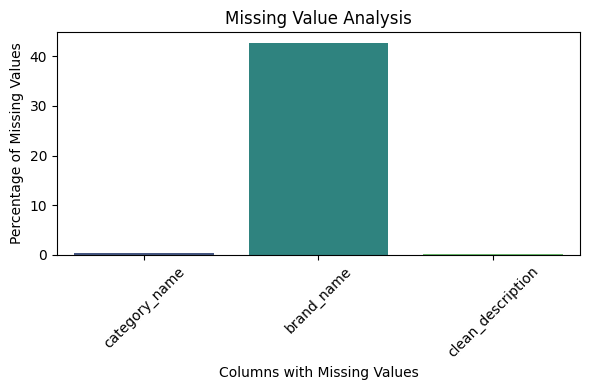

In [10]:
# Create a bar plot to visualize missing value percentages
plt.figure(figsize=(6, 4))
sns.barplot(x=missing_value_info.index, y=missing_value_info['Percentage'], palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Columns with Missing Values')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Value Analysis')
plt.tight_layout()

# Show the plot
plt.show()

### Question 1.2

Find the price information from the data:
* Write code to print the median price of the items in the data;
* What is the 90th percentile value on the price;
* Draw the histogram chart for the price of the items in the data with 50 bins.

Answer 1.2

In [11]:
# Print the median price
median_price = df1['price'].median()
print(f"Median Price: {median_price:.2f}")

Median Price: 17.00


In [12]:
# Calculate the 90th percentile price
percentile_90th = df1['price'].quantile(0.90)
print(f"90th Percentile Price: {percentile_90th:.2f}")

90th Percentile Price: 51.00


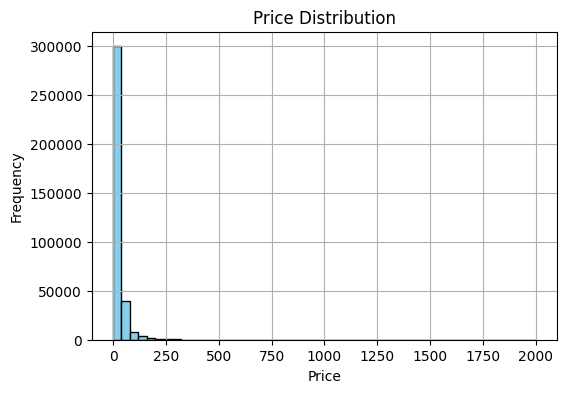

In [13]:
# Draw a histogram chart for the price with 50 bins
plt.figure(figsize=(6, 4))
plt.hist(df1['price'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.grid(True)
plt.show()

### Question 1.3

Exploring the shipping information from the data:
• Write code to find out the percentage of the items that are paid by the buyers.
* Draw (two) histogram graphs in one plot on the price for seller pays shipping and buyer
pays shipping (50 bins).
* When buying the items online, do you need to pay higher price if seller pays for the
shipping? Write the code to find out (Compare the median price of items paid by buyers
and items paid by sellers, and explain the result in the comment and report).
(Optional: You could use the subplot from EDA)


Answer 1.3

In [14]:
# Calculate the percentage of items paid by buyers
percentage_buyer_pays = (df1['shipping'] == 1).mean() * 100
print(f"Percentage of Items Paid by Buyers: {percentage_buyer_pays:.2f}%")

Percentage of Items Paid by Buyers: 44.62%


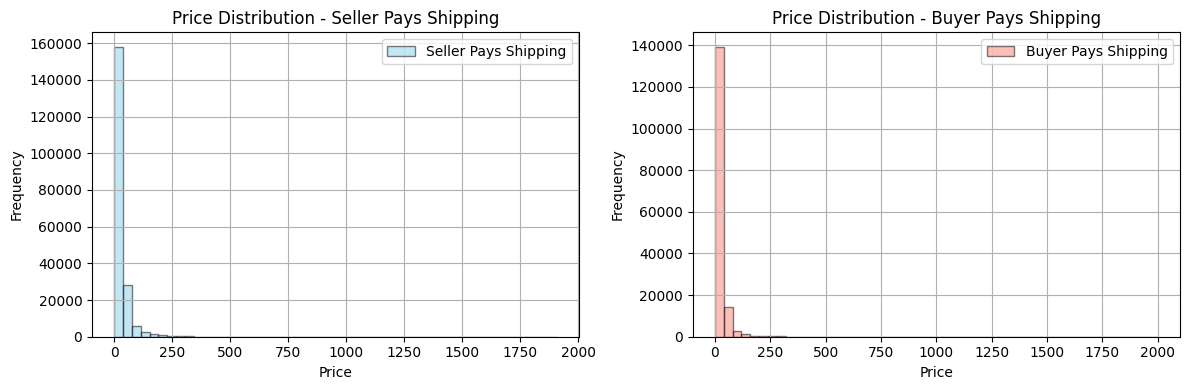

In [15]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Histogram for seller pays shipping (left subplot)
ax1.hist(df1[df1['shipping'] == 0]['price'], bins=50, alpha=0.5, label='Seller Pays Shipping', color='skyblue', edgecolor='black')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frequency')
ax1.set_title('Price Distribution - Seller Pays Shipping')
ax1.legend()
ax1.grid(True)

# Histogram for buyer pays shipping (right subplot)
ax2.hist(df1[df1['shipping'] == 1]['price'], bins=50, alpha=0.5, label='Buyer Pays Shipping', color='salmon', edgecolor='black')
ax2.set_xlabel('Price')
ax2.set_ylabel('Frequency')
ax2.set_title('Price Distribution - Buyer Pays Shipping')
ax2.legend()
ax2.grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Compare median prices for seller and buyer pays shipping
median_price_seller_pays = df1[df1['shipping'] == 0]['price'].median()
median_price_buyer_pays = df1[df1['shipping'] == 1]['price'].median()

In [ ]:
# Explanation
print(f"Median Price when Seller Pays Shipping: {median_price_seller_pays:.2f}")
print(f"Median Price when Buyer Pays Shipping: {median_price_buyer_pays:.2f}")

Median Price when Seller Pays Shipping: 19.00
Median Price when Buyer Pays Shipping: 14.00


In [ ]:
def compare_median_prices(df):
    # Calculate median price for items where the seller pays shipping
    median_price_seller_pays = df1[df1['shipping'] == 0]['price'].median()

    # Calculate median price for items where the buyer pays shipping
    median_price_buyer_pays = df1[df1['shipping'] == 1]['price'].median()

    # Explanation based on the comparison
    if median_price_seller_pays > median_price_buyer_pays:
        explanation = "When the seller pays for shipping, the median price is higher, suggesting that sellers may charge a higher price when they cover shipping costs."
    elif median_price_seller_pays < median_price_buyer_pays:
        explanation = "When the buyer pays for shipping, the median price is higher, indicating that buyers may be willing to pay a higher price if they don't have to cover shipping costs."
    else:
        explanation = "The median prices for both cases are the same."

    return median_price_seller_pays, median_price_buyer_pays, explanation


In [ ]:
explanation = compare_median_prices(df1)
print(explanation)

(19.0, 14.0, 'When the seller pays for shipping, the median price is higher, suggesting that sellers may charge a higher price when they cover shipping costs.')


In [ ]:
# Assuming you have loaded your dataset into the 'df' DataFrame
median_seller, median_buyer, explanation = compare_median_prices(df1)

# Print the results and explanation
print(f"Median Price when Seller Pays Shipping: {median_seller:.2f}")
print(f"Median Price when Buyer Pays Shipping: {median_buyer:.2f}")
print(explanation)

Median Price when Seller Pays Shipping: 19.00
Median Price when Buyer Pays Shipping: 14.00
When the seller pays for shipping, the median price is higher, suggesting that sellers may charge a higher price when they cover shipping costs.


### Question 1.4

You are required to find out the item condition information from the data. Lower the number
(value), the better condition of the item.
* Write the code to find out (print) the count of the rows on each number (value) in column
item_condition_id.
* Draw the boxplot graphs (one plot) on the price for each item condition value, and find out
out whether the better condition of the item could have higher median price (draw the plot
and answer this question in the comment and report).

Answer 1.4

In [ ]:
# Count of rows on each item condition value
print(df1['item_condition_id'].value_counts())

1    153402
3    104248
2     89843
4      7768
5       547
Name: item_condition_id, dtype: int64


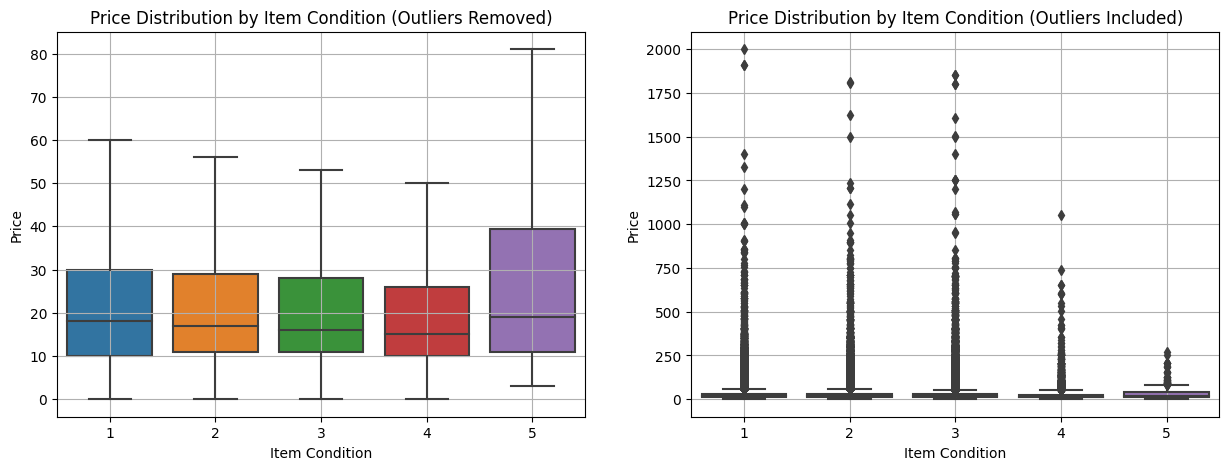

In [ ]:
# Boxplot on the price for each item condition value
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot with outliers removed
sns.boxplot(ax=axes[0], x='item_condition_id', y='price', data=df1, showfliers=False)
axes[0].set_xlabel('Item Condition')
axes[0].set_ylabel('Price')
axes[0].set_title('Price Distribution by Item Condition (Outliers Removed)')
axes[0].grid(True)

# Boxplot with outliers included
sns.boxplot(ax=axes[1], x='item_condition_id', y='price', data=df1)
axes[1].set_xlabel('Item Condition')
axes[1].set_ylabel('Price')
axes[1].set_title('Price Distribution by Item Condition (Outliers Included)')
axes[1].grid(True)

plt.show()

In [ ]:
outlier_data = {}
for i_condition in np.unique(df1.item_condition_id):
    item_condition_prices = df1[df1['item_condition_id'] == i_condition]['price']

    q1 = item_condition_prices.quantile(0.25)
    q3 = item_condition_prices.quantile(0.75)
    iqr = q3 - q1
    outliers = item_condition_prices[(item_condition_prices < q1 - 1.5 * iqr) | (item_condition_prices > q3 + 1.5 * iqr)]
    outlier_data[i_condition] = {
        'q1': q1,
        'q3': q3,
        'IQR': iqr,
        'IQR Min-Max Range': f'{q1 - 1.5 * iqr} - {q3 + 1.5 * iqr}',
        'Mean': item_condition_prices.mean(),
        'Median': item_condition_prices.median(),
        'Outliers Below the IQR': len(outliers[item_condition_prices < q1]),
        '% of Outliers Below the IQR': len(outliers[item_condition_prices < q1])  / len(item_condition_prices) * 100,
        'Outliers Above the IQR': len(outliers[item_condition_prices > q3]),
        '% Outliers Above the IQR': (len(outliers[item_condition_prices > q3])  / len(item_condition_prices)) * 100,
        'Outlier Range': f'{min(outliers)} - {max(outliers)}',
        'Price Range': f'{min(item_condition_prices)} - {max(item_condition_prices)}'
    }

outlier_df = pd.DataFrame(outlier_data).T
outlier_df.index.name = 'Item Condition'
outlier_df


,q1,q3,IQR,IQR Min-Max Range,Mean,Median,Outliers Below the IQR,% of Outliers Below the IQR,Outliers Above the IQR,% Outliers Above the IQR,Outlier Range,Price Range
Item Condition,,,,,,,,,,,,
1,10.0,30.0,20.0,-20.0 - 60.0,26.388144,18.0,0,0.0,11106,7.239801,60.5 - 2000.0,0.0 - 2000.0
2,11.0,29.0,18.0,-16.0 - 56.0,27.46293,17.0,0,0.0,7662,8.52821,57.0 - 1815.0,0.0 - 1815.0
3,11.0,28.0,17.0,-14.5 - 53.5,26.476513,16.0,0,0.0,9335,8.954608,54.0 - 1850.0,0.0 - 1850.0
4,10.0,26.0,16.0,-14.0 - 50.0,24.961187,15.0,0,0.0,671,8.638002,51.0 - 1050.0,0.0 - 1050.0
5,11.0,39.5,28.5,-31.75 - 82.25,31.341865,19.0,0,0.0,42,7.678245,84.0 - 269.0,3.0 - 269.0


#### Observations
* The median price for items is in range 15 - 19 for all the item conditions. The highest quality items (condition 1) have median price of 18, while the lowest quality items (condition 5) have the highest median price of 19. So the better condition of the item does not necessarily have higher median price or vice versa.
* The median price for items in each item condition group is very close to each other and IQR range for all group remains relatively same.
* The median price for items in each item condition group is very close to the mean price for items in each item condition group.
* There are outliers in each item condition group. The number of outliers decreases as the item condition decreases. Each item condition group outliers ranges between 7 - 9 percent.
* There are no outliers below the IQR for any item condition group. All outliers are above the IQR.
* The highest quality items (condition 1) seems to have higher price range than the other item condition groups (including outliers) and vice versa for the lowest quality item.


### Question 1.5

Conduct the category analysis and find out the relevant information:
* Write the code to find out (print) how many unique categories you could find from column
category_name.
* For the items with worst condition only (highest value from item_condition_id), write code
to (print) find out the top 3 categories (now you probably understand the findings you had
in Question 1.4).

Answer 1.5

In [ ]:
# Number of unique categories
print(f'Number of unique categories: {len(df1.category_name.unique())}')

Number of unique categories: 1136


In [ ]:
# the items with worst condition
worst_condition_items = df1[df1['item_condition_id'] == df1['item_condition_id'].max()]

# the top 3 categories
top_3_categories = worst_condition_items['category_name'].value_counts()[:3]

print(f'Top 3 categories for items with worst condition:\n{top_3_categories}')

Top 3 categories for items with worst condition:
Electronics/Cell Phones & Accessories/Cell Phones & Smartphones    137
Electronics/Video Games & Consoles/Games                            42
Electronics/Video Games & Consoles/Consoles                         35
Name: category_name, dtype: int64


#### Observations
* The top categories in the worst condition items are electronics, which includes cell phones, video games, computers & consoles.
* This explains why the median of the worst condition items is higher than the highest quality item. The electronics items are generally expensive than other items.

### Question 1.6

The categories in column category_name have 3 parts. The three parts (main_cat,subcat_1 and
subcat_2) are concatenated with ’/’ character sequentially in the data now.
* Write the function (must be function) to split the text content (string value in each row) in
column category_name by ’/’ character. you need to handle the exception in the function
for those has missing values (NaN). For missing values (NaN), the results from splitting
should be ”Category Unknown”, ”Category Unknown”, ”Category Unknown”.
* Use the above function you wrote to create three new columns main_cat,subcat_1 and
subcat_2 with corresponding values from the result of splitting. Print out the dataframe to
show the top 5 rows for three new columns main_cat,subcat_1 and subcat_2.


Answer 1.6

In [ ]:
def split_category_name(category_name):
    if pd.isna(category_name):
        return 'Category Unknown', 'Category Unknown', 'Category Unknown'
    else:
        assert category_name.count('/') >= 2, f'Category name "{category_name}" does not have all three parts'
        return category_name.split('/')

In [ ]:
# Adding new columns main_cat, subcat_1 and subcat_2
category_series = df1['category_name'].apply(split_category_name)

# Transposing the list to column(https://stackoverflow.com/a/71294458). This transposes the list for example [[a, b, c], [d, e, f]] to [[a, d], [b, e], [c, f]] like so.
df1['main_cat'], df1['subcat_1'], df1['subcat_2'] = zip(*category_series)
df1[['main_cat', 'subcat_1', 'subcat_2']].head()

,main_cat,subcat_1,subcat_2
0,Women,Tops & Blouses,Blouse
1,Women,Tops & Blouses,"Tank, Cami"
2,Kids,Toys,Action Figures & Statues
3,Kids,Boys 2T-5T,Shoes
4,Kids,Girls 0-24 Mos,Dresses


### Question 1.7

After splitting the category for column category_name, we now have the three main details
regarding to the category information. However, we need to clean the text in each of the new
three columns in lowercase.
* Write code (or function) to change the text (value in each row) from the new three columns
to lowercase.
* Draw the bar chart to find out the top 5 most popular main categories (in column main_cat)
in the data (only showing the top 5).
* Write code (or function) to (print) find out how many unique main categories (in col umn
main_cat), unique first sub-categories (in column subcat_1) and unique second
sub-categories (in column subcat_2) respectively.

Answer 1.7

In [ ]:
def lowercase_category_names(df):
    df['main_cat'] = df['main_cat'].str.lower()
    df['subcat_1'] = df['subcat_1'].str.lower()
    df['subcat_2'] = df['subcat_2'].str.lower()
    return df

lowercase_category_names(df1)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,clean_description,main_cat,subcat_1,subcat_2
0,128037,Bundle for Sassy Sisters,3,Women/Tops & Blouses/Blouse,NaN,16.0,0,max cleo black dress paper crane black tank to...,women,tops & blouses,blouse
1,491755,PINK VS TANK,2,"Women/Tops & Blouses/Tank, Cami",NaN,17.0,0,sequin pink sign sequins missing gently worn,women,tops & blouses,"tank, cami"
2,470924,Funko Pop Unmasked Cyclops,1,Kids/Toys/Action Figures & Statues,Funko,30.0,1,box great condition comes soft pop protector p...,kids,toys,action figures & statues
3,491263,Baby Roshe Runs,3,Kids/Boys 2T-5T/Shoes,Nike,19.0,0,baby black nike roshe runs size 5c,kids,boys 2t-5t,shoes
4,836489,Baby Girl Ralph Lauren dresses,3,Kids/Girls 0-24 Mos/Dresses,Ralph Lauren,24.0,0,2 polo dresses 3 months wore washed dreft pink...,kids,girls 0-24 mos,dresses
...,...,...,...,...,...,...,...,...,...,...,...
355803,760377,Beats By Dre Solo White,3,"Electronics/TV, Audio & Surveillance/Headphones",Beats,45.0,1,beats dre solo white gently used work great,electronics,"tv, audio & surveillance",headphones
355804,780889,4 New Leap Frog Leapster Learning Games,1,Kids/Toys/Learning & Education,Leap Frog,9.0,1,viewing 4 new leap frog leapster learning game...,kids,toys,learning & education
355805,650579,Torrid bra size 42ddd,3,Women/Underwear/Bras,Torrid,20.0,1,couple places lace snagged tell fairly good co...,women,underwear,bras
355806,481154,Vans shoes,2,Men/Shoes/Fashion Sneakers,VANS,23.0,0,size 11,men,shoes,fashion sneakers


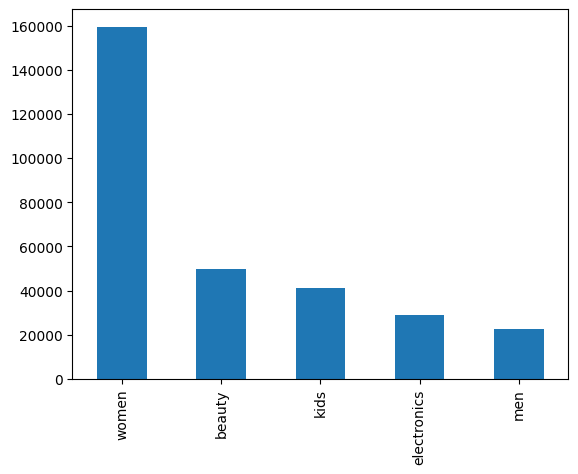

In [ ]:
# the top 5 most popular main categories
top_5_main_cat = df1['main_cat'].value_counts()[:5]
top_5_main_cat.plot.bar()
plt.show()

In [ ]:
print(f'Number of unique main categories: {len(df1.main_cat.unique())}')
print(f'Number of unique first sub-categories: {len(df1.subcat_1.unique())}')
print(f'Number of unique second sub-categories: {len(df1.subcat_2.unique())}')

Number of unique main categories: 11
Number of unique first sub-categories: 114
Number of unique second sub-categories: 788


### Question 1.8

Exploring the price and categories.
* Write code to (print) find out the median price for all the categories in new column main_cat.
* Draw the bar chart to find out the top 10 most expensive first sub-categories (in column
subcat_1) in the data.
* Draw the bar chart to find out the top 10 cheapest second sub-categories (in column
subcat_2) in the data.


Answer 1.8

### Question 1.9

Exploring the price and brand.
* Write code to (print) find out the median price for all the brands (fill NaN with ’brand
unavailable’).
* Draw the bar chart to find out the top 10 most popular brands in the data.


Answer 1.9

### Question 1.10

Item Description Analysis.
* Could you draw the wordcloud chart by using the column clean_description.
* Divide the data with quantiles of the price (using qcut from pandas to obtain the first/sec
ond/third/fourth quantile).
* Draw the wordcould by using the column clean_description on each quantile of price data.


Answer 1.10

### =============== THE END ===============

# Part-2
## Time series analysis exercise

### Data Preprocessing

In [ ]:
# load the dataset file and read the csv
file_name = "nyc_taxi.csv"

# Load the CSV file into a DataFrame
dataset2 = pd.read_csv(folder_path + file_name)

In [ ]:
dataset2.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [ ]:
dataset2.shape

(10320, 2)

In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.4+ KB


In [ ]:
dataset2.describe()

,value
count,10320.000000
mean,15137.569380
std,6939.495808
min,8.000000
25%,10262.000000
50%,16778.000000
75%,19838.750000
max,39197.000000


In [ ]:
# Create a copy the dataset to work on task
df2 = dataset2.copy()

### Question 2.1

The dataset used here is the New York City Taxi Demand dataset. The raw data is from the
NYC Taxi and Limousine Commission. The data included here consists of aggregating the total
number of taxi passengers into 30 minute buckets. In this question, we will simply process the
data and explore the time series.
* Create two new dataframes df_day and df_hour by aggregating the demand value on
daily and hourly level.
* Plot the demand value in two line charts for both df_day and df_hour dataframes.
* Plot the seasonal decomposition components (Trend, Seasonal, Residual) from df_day
dataframe, also find out the p value from adfuller test. Do you think the df_day is stationary
enough (please explain your reasons in comments and report)?


In [ ]:
# Import important libraries for timeseries data
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Convert the 'timestamp' column to datetime type
df2['timestamp'] = pd.to_datetime(df2['timestamp'])

In [ ]:
# Set the 'timestamp' column as the index
df2.set_index('timestamp', inplace=True)

In [ ]:
# Create df_day by aggregating the demand on a daily level
df2_day = df2.resample('D').sum()

In [ ]:
# Create df_hour by aggregating the demand on an hourly level
df2_hour = df2.resample('H').sum()

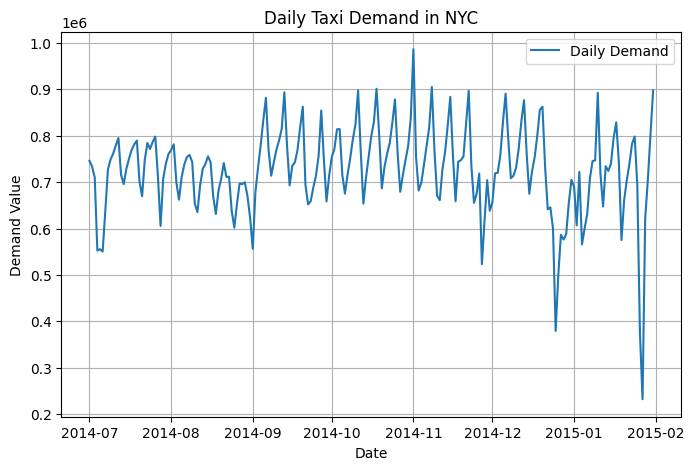

In [ ]:
# Plot demand values for df_day
plt.figure(figsize=(8, 5))
plt.plot(df2_day.index, df2_day['value'], label='Daily Demand')
plt.title('Daily Taxi Demand in NYC')
plt.xlabel('Date')
plt.ylabel('Demand Value')
plt.legend()
plt.grid(True)
plt.show()

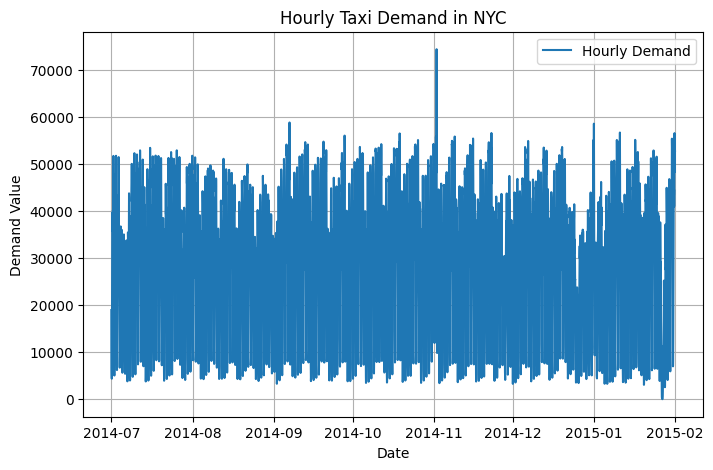

In [ ]:
# Plot demand values for df_hour
plt.figure(figsize=(8, 5))
plt.plot(df2_hour.index, df2_hour['value'], label='Hourly Demand')
plt.title('Hourly Taxi Demand in NYC')
plt.xlabel('Date')
plt.ylabel('Demand Value')
plt.legend()
plt.grid(True)
plt.show()

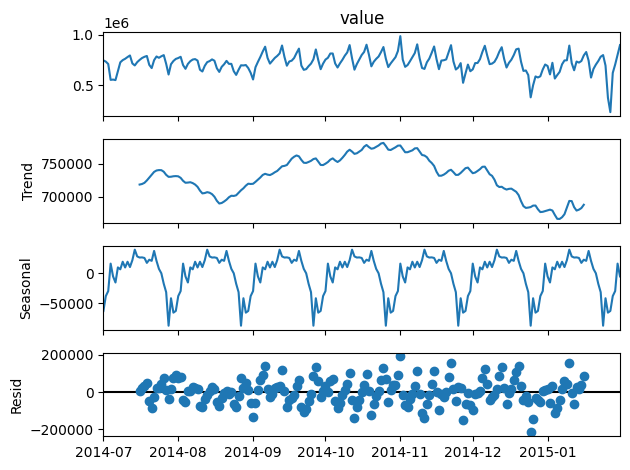

In [ ]:
# Decompose df_day and calculate the p-value from the ADF test
result = seasonal_decompose(df2_day['value'], model='additive', period=30)  # Assuming a seasonality of 30 days

# Plot the decomposed components
result.plot()
plt.show()

In [ ]:
# Perform the ADF test (adfuller test) to check stationarity
adf_result = adfuller(df2_day['value'], autolag='AIC')

# Extract p-value from the ADF test
p_value = adf_result[1]

# Check if df_day is stationary based on the p-value
# A common threshold for significance is 0.05
if p_value <= 0.05:
    stationary_status = "stationary"
else:
    stationary_status = "not stationary"

In [ ]:
# Print the p-value and stationary status
print(f'ADF Test p-value: {p_value}')
print(f'Daily Data is {stationary_status}')

ADF Test p-value: 0.009424599993717633
Daily Data is stationary


### Question 2.2

In this question, we will try to use time series model such as ARIMA and others to build the
model(s) for forecasting the future.
* Create the acf and pacf plots for df_day dataframe.
* Find the best model with different parameters on ARIMA model. The parameter range for
p,d,q are all from [0, 1, 2]. In total, you need to find out the best model with lowest Mean
Abosulate Error from 27 choices based on the time from ”Jul-01-2014” to ”Dec-01-2014”.
* Using the best model in above steps to forecast the time from ”Jan-01-2015” to
”Jan-31-2015”. Plot the predicted value and the true demand value from ”Jan-01-2015” to
”Jan-31-2015”.
* Could you think of any other model (not as same as ARIMA) could do the forecasting for
demand value from ”Jan-01-2015” to ”Jan-31-2015”? You could choose one model
(except ARIMA) and train the model based on the demand value from ”Jul-01-2014” to
”Dec-01-2014” (same training data as the ARIMA). Hint: there are some resources
regarding other time series forecasting models such as prophet here and also the
exponential smoothing here.


### Question 2.3

In this question, we will detect the anomaly within the df_day dataframe.
* Create the Weekday column according to the timestamp column in df_day dataframe. The
value in Weekday column should be from [’Monday’, ’Tuesday’, ’Wednesday’,
’Thursday’,’Friday’, ’Saturday’, ’Sunday’]. Also create the Hour, Day, Month, Year,
Month_day (numeric format on day of the month), Lag (yesterday’s demand value ), and
Rolling_Mean (rolling 7 days mean demand value, minimized period is 1) 7 new columns
in df_day dataframe according to the timestamp column.
* Using Isolation Forest with above crafted features in df_day to find out the date which is
identified as ’outlier’.


Answer 2.3

In [ ]:
# Create the Weekday column
df2_day['Weekday'] = df2_day.index.day_name()
df2_day.Weekday = df2_day.Weekday.astype('category')
print(df2_day.Weekday.unique().tolist())

# Create the Hour column
df2_day['Hour'] = df2_day.index.hour

# Create the Day column
df2_day['Day'] = df2_day.index.day

# Create the Month column
df2_day['Month'] = df2_day.index.month

# Create the Year column
df2_day['Year'] = df2_day.index.year

# Create the Month_day column
df2_day['Month_day'] = df2_day.index.day

# Create the Lag column
df2_day['Lag'] = df2_day['value'].shift(1)

# Create the Rolling_Mean column
df2_day['Rolling_Mean'] = df2_day['value'].rolling(7).mean()

df2_day.head(10)

['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday']


,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean
timestamp,,,,,,,,,
2014-07-01,745967,Tuesday,0,1,7,2014,1,NaN,NaN
2014-07-02,733640,Wednesday,0,2,7,2014,2,745967.0,NaN
2014-07-03,710142,Thursday,0,3,7,2014,3,733640.0,NaN
2014-07-04,552565,Friday,0,4,7,2014,4,710142.0,NaN
2014-07-05,555470,Saturday,0,5,7,2014,5,552565.0,NaN
2014-07-06,550285,Sunday,0,6,7,2014,6,555470.0,NaN
2014-07-07,636570,Monday,0,7,7,2014,7,550285.0,640662.714286
2014-07-08,726535,Tuesday,0,8,7,2014,8,636570.0,637886.714286
2014-07-09,748567,Wednesday,0,9,7,2014,9,726535.0,640019.142857


In [ ]:
# Using LabelEncoder to encode the categorical features
from sklearn.preprocessing import LabelEncoder

# Create the LabelEncoder instance
le = LabelEncoder()

df2_day['Weekday'] = le.fit_transform(df2_day['Weekday'])
df2_day.head(10)

,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean
timestamp,,,,,,,,,
2014-07-01,745967,5,0,1,7,2014,1,NaN,NaN
2014-07-02,733640,6,0,2,7,2014,2,745967.0,NaN
2014-07-03,710142,4,0,3,7,2014,3,733640.0,NaN
2014-07-04,552565,0,0,4,7,2014,4,710142.0,NaN
2014-07-05,555470,2,0,5,7,2014,5,552565.0,NaN
2014-07-06,550285,3,0,6,7,2014,6,555470.0,NaN
2014-07-07,636570,1,0,7,7,2014,7,550285.0,640662.714286
2014-07-08,726535,5,0,8,7,2014,8,636570.0,637886.714286
2014-07-09,748567,6,0,9,7,2014,9,726535.0,640019.142857


In [ ]:
# impute the missing values with the mean
df2_day[['Lag', 'Rolling_Mean']] = df2_day[['Lag', 'Rolling_Mean']].fillna(df2_day.mean())
df2_day.head(10)

,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean
timestamp,,,,,,,,,
2014-07-01,745967,5,0,1,7,2014,1,725803.724299,727492.961039
2014-07-02,733640,6,0,2,7,2014,2,745967.000000,727492.961039
2014-07-03,710142,4,0,3,7,2014,3,733640.000000,727492.961039
2014-07-04,552565,0,0,4,7,2014,4,710142.000000,727492.961039
2014-07-05,555470,2,0,5,7,2014,5,552565.000000,727492.961039
2014-07-06,550285,3,0,6,7,2014,6,555470.000000,727492.961039
2014-07-07,636570,1,0,7,7,2014,7,550285.000000,640662.714286
2014-07-08,726535,5,0,8,7,2014,8,636570.000000,637886.714286
2014-07-09,748567,6,0,9,7,2014,9,726535.000000,640019.142857


In [ ]:
from sklearn.ensemble import IsolationForest

model = IsolationForest()
model.fit(df2_day)

# Create the prediction column
df2_day['anomaly'] = model.predict(df2_day)
anomaly_df = df2_day[df2_day['anomaly'] == -1].copy()

# Convert the Weekday column back to categorical
anomaly_df['Weekday'] = le.inverse_transform(anomaly_df['Weekday'])
anomaly_df.head(10)

,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,anomaly
timestamp,,,,,,,,,,
2014-07-01,745967,Tuesday,0,1,7,2014,1,725803.724299,727492.961039,-1
2014-07-04,552565,Friday,0,4,7,2014,4,710142.000000,727492.961039,-1
2014-07-05,555470,Saturday,0,5,7,2014,5,552565.000000,727492.961039,-1
2014-07-06,550285,Sunday,0,6,7,2014,6,555470.000000,727492.961039,-1
2014-07-07,636570,Monday,0,7,7,2014,7,550285.000000,640662.714286,-1
2014-07-08,726535,Tuesday,0,8,7,2014,8,636570.000000,637886.714286,-1
2014-08-30,669853,Saturday,0,30,8,2014,30,699744.000000,665122.142857,-1
2014-08-31,622555,Sunday,0,31,8,2014,31,669853.000000,662829.714286,-1
2014-09-01,556314,Monday,0,1,9,2014,1,622555.000000,656321.000000,-1


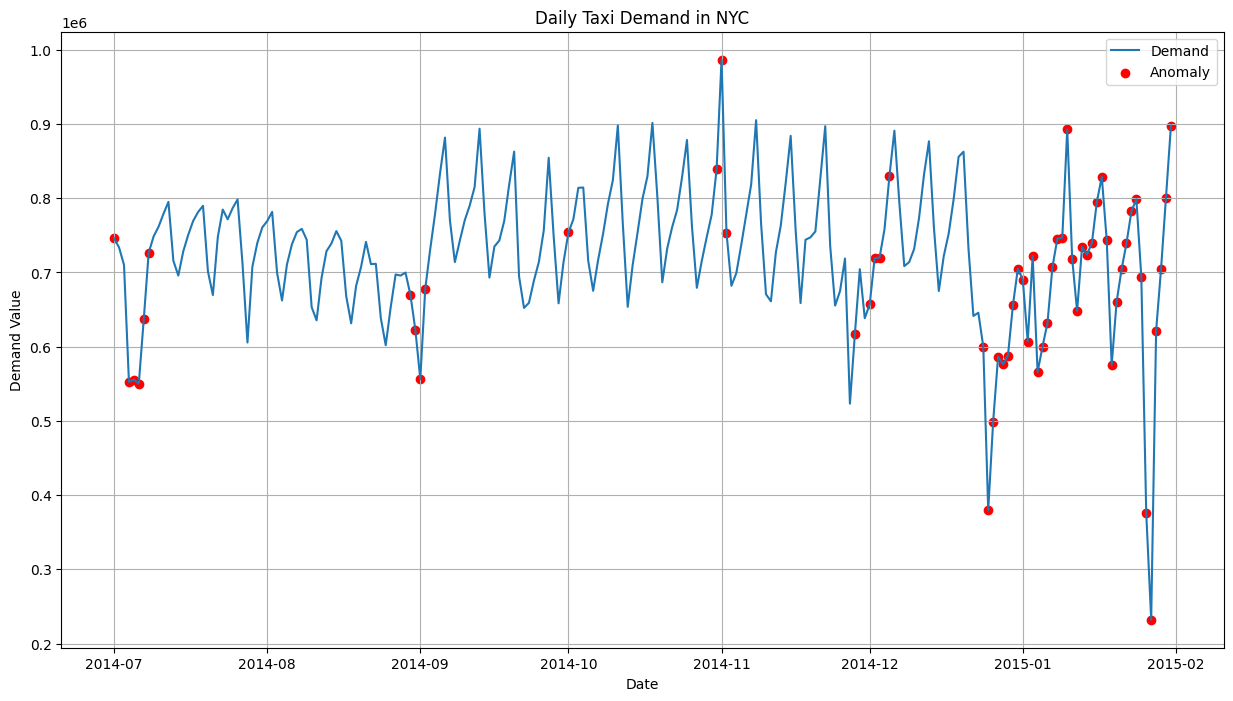

In [ ]:
# Plotting the anomaly dataframe
plt.figure(figsize=(15, 8))
plt.plot(df2_day.index, df2_day['value'], label='Demand')
plt.scatter(anomaly_df.index, anomaly_df['value'], c='red', label='Anomaly')
plt.title('Daily Taxi Demand in NYC')
plt.xlabel('Date')
plt.ylabel('Demand Value')
plt.legend()
plt.grid(True)
plt.show()


## ------------- THE END -------------